In [159]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

def plot_boundary(X, y, clf, plot_step=0.02, buffer=0.1):
    
    x_min, x_max = X[:, 0].min() - buffer, X[:, 0].max() + buffer
    y_min, y_max = X[:, 1].min() - buffer, X[:, 1].max() + buffer
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

# Linear regression

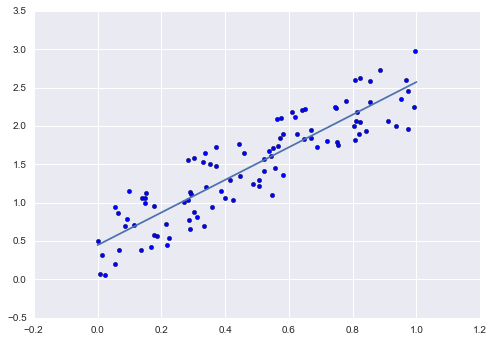

In [29]:
x = np.random.random(100)
y = 2*x + np.random.random(100)
x = np.matrix(x).T
y = np.matrix(y).T

fig, ax = plt.subplots()
ax.scatter(x, y)

lin_model = LinearRegression()
lin_model.fit(x, y)

t = np.matrix(np.linspace(0, 1, 100)).T
pred = lin_model.predict(t)
ax.plot(t, pred)

plt.show()

# KNN

## Generer data

In [154]:
x = np.random.random(200)
y = np.random.random(200)
data = pd.DataFrame(data=[x, y]).transpose()
data.columns = ['x', 'y']

# Lar diagonalen være grensen
data['class'] = np.greater(data['x'], data['y'] + np.random.uniform(-0.1, 0.1, len(data['y']))).astype(int)

data.head()

,x,y,class
0,0.889728,0.091182,1
1,0.284777,0.561101,0
2,0.204292,0.579062,0
3,0.261932,0.589141,0
4,0.519424,0.231299,1


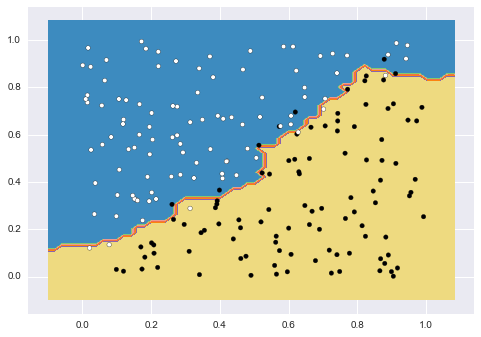

In [164]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(data.drop(['class'], axis=1), data['class'])

plot_boundary(np.array(data), None, knn_model)
plt.scatter('x', 'y', data=data, c='class')
plt.show()